In [1]:
import pandas as pd
import joblib
from google.cloud import storage
import os
import numpy as np
from tqdm import tqdm


storage_client = storage.Client()
bucket = storage_client.bucket('demeter-labs')
blob = bucket.blob('tea/models/planet_year_v0.joblib')
blob.download_to_filename('planet_year_v0.joblib')

model = joblib.load('planet_year_v0.joblib')
os.remove('planet_year_v0.joblib')

def process_planet_embeddings(parquet_uri, output_dir):
    # Load and pivot embeddings
    embeddings_df = pd.read_parquet(parquet_uri)
    pivot_embeddings = embeddings_df.pivot_table(
        index='id', columns='time_period', values=['embedding'])
    del embeddings_df
    
    pivot_embeddings = pivot_embeddings.dropna()
    feature_cols = [col for col in pivot_embeddings.columns if 'embedding' in col]
    list_of_arrays = []
    for col in feature_cols:
        print(col)
        list_of_arrays.append(np.stack(pivot_embeddings[col].values))
    all_arrays = np.hstack(list_of_arrays)
    del list_of_arrays
    
    # Create column names and DataFrame
    new_column_names = [f"{col[0]}_{col[1]}_{i}" for col in pivot_embeddings.columns for i in range(len(pivot_embeddings.iloc[0, 0]))]
    expanded_df_np = pd.DataFrame(all_arrays, columns=new_column_names)
    del all_arrays
    
    # Make probability predictions
    probabilities = model.predict_proba(expanded_df_np)
    del expanded_df_np
    
    # Create results dataframe with just id and probability
    results_df = pd.DataFrame({
        'id': pivot_embeddings.reset_index()['id'],
        'probability': probabilities[:, 1]
    })
    del pivot_embeddings
    del probabilities
    
    # Save predictions
    output_filename = os.path.basename(parquet_uri).replace('.parquet', '_predictions.parquet')
    output_path = os.path.join(output_dir, output_filename)
    results_df.to_parquet(output_path)
    del results_df


# List files in GCS bucket
blobs = list(bucket.list_blobs(prefix='tea/planet_embeddings/'))
parquet_files = [f"gs://demeter-labs/{blob.name}" for blob in blobs if blob.name.endswith('.parquet')]

# Process each parquet file
output_dir = '/home/christopher.x.ren/planet_classifier_output'
os.makedirs(output_dir, exist_ok=True)

for parquet_file in tqdm(parquet_files):
    process_planet_embeddings(parquet_file, output_dir)


  0%|          | 0/63 [00:00<?, ?it/s]

('embedding', '2023_09')
('embedding', '2023_10')
('embedding', '2023_11')
('embedding', '2023_12')
('embedding', '2024_01')
('embedding', '2024_02')
('embedding', '2024_03')
('embedding', '2024_04')
('embedding', '2024_05')
('embedding', '2024_06')
('embedding', '2024_07')
('embedding', '2024_08')


  2%|▏         | 1/63 [00:55<57:06, 55.27s/it]

('embedding', '2023_09')
('embedding', '2023_10')
('embedding', '2023_11')
('embedding', '2023_12')
('embedding', '2024_01')
('embedding', '2024_02')
('embedding', '2024_03')
('embedding', '2024_04')
('embedding', '2024_05')
('embedding', '2024_06')
('embedding', '2024_07')
('embedding', '2024_08')


  3%|▎         | 2/63 [03:50<2:08:08, 126.04s/it]

('embedding', '2023_09')
('embedding', '2023_10')
('embedding', '2023_11')
('embedding', '2023_12')
('embedding', '2024_01')
('embedding', '2024_02')
('embedding', '2024_03')
('embedding', '2024_04')
('embedding', '2024_05')
('embedding', '2024_06')
('embedding', '2024_07')
('embedding', '2024_08')


  5%|▍         | 3/63 [05:42<1:59:24, 119.42s/it]

('embedding', '2023_09')
('embedding', '2023_10')
('embedding', '2023_11')
('embedding', '2023_12')
('embedding', '2024_01')
('embedding', '2024_02')
('embedding', '2024_03')
('embedding', '2024_04')
('embedding', '2024_05')
('embedding', '2024_06')
('embedding', '2024_07')
('embedding', '2024_08')


  6%|▋         | 4/63 [09:00<2:28:05, 150.61s/it]

('embedding', '2023_09')
('embedding', '2023_10')
('embedding', '2023_11')
('embedding', '2023_12')
('embedding', '2024_01')
('embedding', '2024_02')
('embedding', '2024_03')
('embedding', '2024_04')
('embedding', '2024_05')
('embedding', '2024_06')
('embedding', '2024_07')
('embedding', '2024_08')


  8%|▊         | 5/63 [12:10<2:39:03, 164.54s/it]

('embedding', '2023_09')
('embedding', '2023_10')
('embedding', '2023_11')
('embedding', '2023_12')
('embedding', '2024_01')
('embedding', '2024_02')
('embedding', '2024_03')
('embedding', '2024_04')
('embedding', '2024_05')
('embedding', '2024_06')
('embedding', '2024_07')
('embedding', '2024_08')


 10%|▉         | 6/63 [12:40<1:52:51, 118.79s/it]

('embedding', '2023_09')
('embedding', '2023_10')
('embedding', '2023_11')
('embedding', '2023_12')
('embedding', '2024_01')
('embedding', '2024_02')
('embedding', '2024_03')
('embedding', '2024_04')
('embedding', '2024_05')
('embedding', '2024_06')
('embedding', '2024_07')
('embedding', '2024_08')


 11%|█         | 7/63 [13:54<1:37:14, 104.18s/it]

('embedding', '2023_09')
('embedding', '2023_10')
('embedding', '2023_11')
('embedding', '2023_12')
('embedding', '2024_01')
('embedding', '2024_02')
('embedding', '2024_03')
('embedding', '2024_04')
('embedding', '2024_05')
('embedding', '2024_06')
('embedding', '2024_07')
('embedding', '2024_08')


 13%|█▎        | 8/63 [15:13<1:28:17, 96.32s/it] 

('embedding', '2023_09')
('embedding', '2023_10')
('embedding', '2023_11')
('embedding', '2023_12')
('embedding', '2024_01')
('embedding', '2024_02')
('embedding', '2024_03')
('embedding', '2024_04')
('embedding', '2024_05')
('embedding', '2024_06')
('embedding', '2024_07')
('embedding', '2024_08')


 14%|█▍        | 9/63 [16:30<1:21:06, 90.12s/it]

('embedding', '2023_09')
('embedding', '2023_10')
('embedding', '2023_11')
('embedding', '2023_12')
('embedding', '2024_01')
('embedding', '2024_02')
('embedding', '2024_03')
('embedding', '2024_04')
('embedding', '2024_05')
('embedding', '2024_06')
('embedding', '2024_07')
('embedding', '2024_08')


 16%|█▌        | 10/63 [18:04<1:20:51, 91.54s/it]

('embedding', '2023_09')
('embedding', '2023_10')
('embedding', '2023_11')
('embedding', '2023_12')
('embedding', '2024_01')
('embedding', '2024_02')
('embedding', '2024_03')
('embedding', '2024_04')
('embedding', '2024_05')
('embedding', '2024_06')
('embedding', '2024_07')
('embedding', '2024_08')


 17%|█▋        | 11/63 [20:04<1:26:40, 100.00s/it]

('embedding', '2023_09')
('embedding', '2023_10')
('embedding', '2023_11')
('embedding', '2023_12')
('embedding', '2024_01')
('embedding', '2024_02')
('embedding', '2024_03')
('embedding', '2024_04')
('embedding', '2024_05')
('embedding', '2024_06')
('embedding', '2024_07')
('embedding', '2024_08')


 19%|█▉        | 12/63 [20:24<1:04:23, 75.75s/it] 

('embedding', '2023_09')
('embedding', '2023_10')
('embedding', '2023_11')
('embedding', '2023_12')
('embedding', '2024_01')
('embedding', '2024_02')
('embedding', '2024_03')
('embedding', '2024_04')
('embedding', '2024_05')
('embedding', '2024_06')
('embedding', '2024_07')
('embedding', '2024_08')


 21%|██        | 13/63 [23:19<1:28:14, 105.89s/it]

('embedding', '2023_09')
('embedding', '2023_10')
('embedding', '2023_11')
('embedding', '2023_12')
('embedding', '2024_01')
('embedding', '2024_02')
('embedding', '2024_03')
('embedding', '2024_04')
('embedding', '2024_05')
('embedding', '2024_06')
('embedding', '2024_07')
('embedding', '2024_08')


 22%|██▏       | 14/63 [25:53<1:38:14, 120.30s/it]

('embedding', '2023_09')
('embedding', '2023_10')
('embedding', '2023_11')
('embedding', '2023_12')
('embedding', '2024_01')
('embedding', '2024_02')
('embedding', '2024_03')
('embedding', '2024_04')
('embedding', '2024_05')
('embedding', '2024_06')
('embedding', '2024_07')
('embedding', '2024_08')


 24%|██▍       | 15/63 [26:30<1:16:13, 95.28s/it] 

('embedding', '2023_09')
('embedding', '2023_10')
('embedding', '2023_11')
('embedding', '2023_12')
('embedding', '2024_01')
('embedding', '2024_02')
('embedding', '2024_03')
('embedding', '2024_04')
('embedding', '2024_05')
('embedding', '2024_06')
('embedding', '2024_07')
('embedding', '2024_08')


 25%|██▌       | 16/63 [26:51<57:15, 73.09s/it]  

('embedding', '2023_09')
('embedding', '2023_10')
('embedding', '2023_11')
('embedding', '2023_12')
('embedding', '2024_01')
('embedding', '2024_02')
('embedding', '2024_03')
('embedding', '2024_04')
('embedding', '2024_05')
('embedding', '2024_06')
('embedding', '2024_07')
('embedding', '2024_08')


 27%|██▋       | 17/63 [29:43<1:18:49, 102.82s/it]

('embedding', '2023_09')
('embedding', '2023_10')
('embedding', '2023_11')
('embedding', '2023_12')
('embedding', '2024_01')
('embedding', '2024_02')
('embedding', '2024_03')
('embedding', '2024_04')
('embedding', '2024_05')
('embedding', '2024_06')
('embedding', '2024_07')
('embedding', '2024_08')


 29%|██▊       | 18/63 [32:19<1:29:00, 118.68s/it]

('embedding', '2023_09')
('embedding', '2023_10')
('embedding', '2023_11')
('embedding', '2023_12')
('embedding', '2024_01')
('embedding', '2024_02')
('embedding', '2024_03')
('embedding', '2024_04')
('embedding', '2024_05')
('embedding', '2024_06')
('embedding', '2024_07')
('embedding', '2024_08')


 30%|███       | 19/63 [32:24<1:02:03, 84.63s/it] 

('embedding', '2023_09')
('embedding', '2023_10')
('embedding', '2023_11')
('embedding', '2023_12')
('embedding', '2024_01')
('embedding', '2024_02')
('embedding', '2024_03')
('embedding', '2024_04')
('embedding', '2024_05')
('embedding', '2024_06')
('embedding', '2024_07')
('embedding', '2024_08')


 32%|███▏      | 20/63 [33:53<1:01:28, 85.78s/it]

('embedding', '2023_09')
('embedding', '2023_10')
('embedding', '2023_11')
('embedding', '2023_12')
('embedding', '2024_01')
('embedding', '2024_02')
('embedding', '2024_03')
('embedding', '2024_04')
('embedding', '2024_05')
('embedding', '2024_06')
('embedding', '2024_07')
('embedding', '2024_08')


 33%|███▎      | 21/63 [37:04<1:22:05, 117.27s/it]

('embedding', '2023_09')
('embedding', '2023_10')
('embedding', '2023_11')
('embedding', '2023_12')
('embedding', '2024_01')
('embedding', '2024_02')
('embedding', '2024_03')
('embedding', '2024_04')
('embedding', '2024_05')
('embedding', '2024_06')
('embedding', '2024_07')
('embedding', '2024_08')


 35%|███▍      | 22/63 [40:10<1:34:21, 138.09s/it]

('embedding', '2023_09')
('embedding', '2023_10')
('embedding', '2023_11')
('embedding', '2023_12')
('embedding', '2024_01')
('embedding', '2024_02')
('embedding', '2024_03')
('embedding', '2024_04')
('embedding', '2024_05')
('embedding', '2024_06')
('embedding', '2024_07')
('embedding', '2024_08')


 37%|███▋      | 23/63 [41:14<1:17:06, 115.67s/it]

('embedding', '2023_09')
('embedding', '2023_10')
('embedding', '2023_11')
('embedding', '2023_12')
('embedding', '2024_01')
('embedding', '2024_02')
('embedding', '2024_03')
('embedding', '2024_04')
('embedding', '2024_05')
('embedding', '2024_06')
('embedding', '2024_07')
('embedding', '2024_08')


 38%|███▊      | 24/63 [44:31<1:31:02, 140.06s/it]

('embedding', '2023_09')
('embedding', '2023_10')
('embedding', '2023_11')
('embedding', '2023_12')
('embedding', '2024_01')
('embedding', '2024_02')
('embedding', '2024_03')
('embedding', '2024_04')
('embedding', '2024_05')
('embedding', '2024_06')
('embedding', '2024_07')
('embedding', '2024_08')


 40%|███▉      | 25/63 [47:27<1:35:40, 151.08s/it]

('embedding', '2023_09')
('embedding', '2023_10')
('embedding', '2023_11')
('embedding', '2023_12')
('embedding', '2024_01')
('embedding', '2024_02')
('embedding', '2024_03')
('embedding', '2024_04')
('embedding', '2024_05')
('embedding', '2024_06')
('embedding', '2024_07')
('embedding', '2024_08')


 41%|████▏     | 26/63 [48:12<1:13:33, 119.27s/it]

('embedding', '2023_09')
('embedding', '2023_10')
('embedding', '2023_11')
('embedding', '2023_12')
('embedding', '2024_01')
('embedding', '2024_02')
('embedding', '2024_03')
('embedding', '2024_04')
('embedding', '2024_05')
('embedding', '2024_06')
('embedding', '2024_07')
('embedding', '2024_08')


 43%|████▎     | 27/63 [51:02<1:20:42, 134.51s/it]

('embedding', '2023_09')
('embedding', '2023_10')
('embedding', '2023_11')
('embedding', '2023_12')
('embedding', '2024_01')
('embedding', '2024_02')
('embedding', '2024_03')
('embedding', '2024_04')
('embedding', '2024_05')
('embedding', '2024_06')
('embedding', '2024_07')
('embedding', '2024_08')


 44%|████▍     | 28/63 [51:38<1:01:08, 104.80s/it]

('embedding', '2023_09')
('embedding', '2023_10')
('embedding', '2023_11')
('embedding', '2023_12')
('embedding', '2024_01')
('embedding', '2024_02')
('embedding', '2024_03')
('embedding', '2024_04')
('embedding', '2024_05')
('embedding', '2024_06')
('embedding', '2024_07')
('embedding', '2024_08')


 46%|████▌     | 29/63 [51:58<44:55, 79.27s/it]   

('embedding', '2023_09')
('embedding', '2023_10')
('embedding', '2023_11')
('embedding', '2023_12')
('embedding', '2024_01')
('embedding', '2024_02')
('embedding', '2024_03')
('embedding', '2024_04')
('embedding', '2024_05')
('embedding', '2024_06')
('embedding', '2024_07')
('embedding', '2024_08')


 48%|████▊     | 30/63 [53:05<41:34, 75.59s/it]

('embedding', '2023_09')
('embedding', '2023_10')
('embedding', '2023_11')
('embedding', '2023_12')
('embedding', '2024_01')
('embedding', '2024_02')
('embedding', '2024_03')
('embedding', '2024_04')
('embedding', '2024_05')
('embedding', '2024_06')
('embedding', '2024_07')
('embedding', '2024_08')


 49%|████▉     | 31/63 [54:18<39:59, 74.98s/it]

('embedding', '2023_09')
('embedding', '2023_10')
('embedding', '2023_11')
('embedding', '2023_12')
('embedding', '2024_01')
('embedding', '2024_02')
('embedding', '2024_03')
('embedding', '2024_04')
('embedding', '2024_05')
('embedding', '2024_06')
('embedding', '2024_07')
('embedding', '2024_08')


 51%|█████     | 32/63 [55:54<42:01, 81.35s/it]

('embedding', '2023_09')
('embedding', '2023_10')
('embedding', '2023_11')
('embedding', '2023_12')
('embedding', '2024_01')
('embedding', '2024_02')
('embedding', '2024_03')
('embedding', '2024_04')
('embedding', '2024_05')
('embedding', '2024_06')
('embedding', '2024_07')
('embedding', '2024_08')


 52%|█████▏    | 33/63 [57:08<39:35, 79.18s/it]

('embedding', '2023_09')
('embedding', '2023_10')
('embedding', '2023_11')
('embedding', '2023_12')
('embedding', '2024_01')
('embedding', '2024_02')
('embedding', '2024_03')
('embedding', '2024_04')
('embedding', '2024_05')
('embedding', '2024_06')
('embedding', '2024_07')
('embedding', '2024_08')


 54%|█████▍    | 34/63 [58:43<40:31, 83.86s/it]

('embedding', '2023_09')
('embedding', '2023_10')
('embedding', '2023_11')
('embedding', '2023_12')
('embedding', '2024_01')
('embedding', '2024_02')
('embedding', '2024_03')
('embedding', '2024_04')
('embedding', '2024_05')
('embedding', '2024_06')
('embedding', '2024_07')
('embedding', '2024_08')


 56%|█████▌    | 35/63 [1:02:01<55:05, 118.04s/it]

('embedding', '2023_09')
('embedding', '2023_10')
('embedding', '2023_11')
('embedding', '2023_12')
('embedding', '2024_01')
('embedding', '2024_02')
('embedding', '2024_03')
('embedding', '2024_04')
('embedding', '2024_05')
('embedding', '2024_06')
('embedding', '2024_07')
('embedding', '2024_08')


 57%|█████▋    | 36/63 [1:05:22<1:04:16, 142.83s/it]

('embedding', '2023_09')
('embedding', '2023_10')
('embedding', '2023_11')
('embedding', '2023_12')
('embedding', '2024_01')
('embedding', '2024_02')
('embedding', '2024_03')
('embedding', '2024_04')
('embedding', '2024_05')
('embedding', '2024_06')
('embedding', '2024_07')
('embedding', '2024_08')


 59%|█████▊    | 37/63 [1:07:45<1:01:55, 142.92s/it]

('embedding', '2023_09')
('embedding', '2023_10')
('embedding', '2023_11')
('embedding', '2023_12')
('embedding', '2024_01')
('embedding', '2024_02')
('embedding', '2024_03')
('embedding', '2024_04')
('embedding', '2024_05')
('embedding', '2024_06')
('embedding', '2024_07')
('embedding', '2024_08')


 60%|██████    | 38/63 [1:08:21<46:13, 110.93s/it]  

('embedding', '2023_09')
('embedding', '2023_10')
('embedding', '2023_11')
('embedding', '2023_12')
('embedding', '2024_01')
('embedding', '2024_02')
('embedding', '2024_03')
('embedding', '2024_04')
('embedding', '2024_05')
('embedding', '2024_06')
('embedding', '2024_07')
('embedding', '2024_08')


 62%|██████▏   | 39/63 [1:11:50<56:10, 140.45s/it]

('embedding', '2023_09')
('embedding', '2023_10')
('embedding', '2023_11')
('embedding', '2023_12')
('embedding', '2024_01')
('embedding', '2024_02')
('embedding', '2024_03')
('embedding', '2024_04')
('embedding', '2024_05')
('embedding', '2024_06')
('embedding', '2024_07')
('embedding', '2024_08')


 63%|██████▎   | 40/63 [1:15:03<59:47, 155.99s/it]

('embedding', '2023_09')
('embedding', '2023_10')
('embedding', '2023_11')
('embedding', '2023_12')
('embedding', '2024_01')
('embedding', '2024_02')
('embedding', '2024_03')
('embedding', '2024_04')
('embedding', '2024_05')
('embedding', '2024_06')
('embedding', '2024_07')
('embedding', '2024_08')


 65%|██████▌   | 41/63 [1:16:38<50:29, 137.72s/it]

('embedding', '2023_09')
('embedding', '2023_10')
('embedding', '2023_11')
('embedding', '2023_12')
('embedding', '2024_01')
('embedding', '2024_02')
('embedding', '2024_03')
('embedding', '2024_04')
('embedding', '2024_05')
('embedding', '2024_06')
('embedding', '2024_07')
('embedding', '2024_08')


 67%|██████▋   | 42/63 [1:17:54<41:47, 119.40s/it]

('embedding', '2023_09')
('embedding', '2023_10')
('embedding', '2023_11')
('embedding', '2023_12')
('embedding', '2024_01')
('embedding', '2024_02')
('embedding', '2024_03')
('embedding', '2024_04')
('embedding', '2024_05')
('embedding', '2024_06')
('embedding', '2024_07')
('embedding', '2024_08')


 68%|██████▊   | 43/63 [1:20:55<45:57, 137.86s/it]

('embedding', '2023_09')
('embedding', '2023_10')
('embedding', '2023_11')
('embedding', '2023_12')
('embedding', '2024_01')
('embedding', '2024_02')
('embedding', '2024_03')
('embedding', '2024_04')
('embedding', '2024_05')
('embedding', '2024_06')
('embedding', '2024_07')
('embedding', '2024_08')


 70%|██████▉   | 44/63 [1:21:47<35:26, 111.94s/it]

('embedding', '2023_09')
('embedding', '2023_10')
('embedding', '2023_11')
('embedding', '2023_12')
('embedding', '2024_01')
('embedding', '2024_02')
('embedding', '2024_03')
('embedding', '2024_04')
('embedding', '2024_05')
('embedding', '2024_06')
('embedding', '2024_07')
('embedding', '2024_08')


 71%|███████▏  | 45/63 [1:23:03<30:22, 101.23s/it]

('embedding', '2023_09')
('embedding', '2023_10')
('embedding', '2023_11')
('embedding', '2023_12')
('embedding', '2024_01')
('embedding', '2024_02')
('embedding', '2024_03')
('embedding', '2024_04')
('embedding', '2024_05')
('embedding', '2024_06')
('embedding', '2024_07')
('embedding', '2024_08')


 73%|███████▎  | 46/63 [1:26:23<37:04, 130.88s/it]

('embedding', '2023_09')
('embedding', '2023_10')
('embedding', '2023_11')
('embedding', '2023_12')
('embedding', '2024_01')
('embedding', '2024_02')
('embedding', '2024_03')
('embedding', '2024_04')
('embedding', '2024_05')
('embedding', '2024_06')
('embedding', '2024_07')
('embedding', '2024_08')


 75%|███████▍  | 47/63 [1:26:40<25:45, 96.62s/it] 

('embedding', '2023_09')
('embedding', '2023_10')
('embedding', '2023_11')
('embedding', '2023_12')
('embedding', '2024_01')
('embedding', '2024_02')
('embedding', '2024_03')
('embedding', '2024_04')
('embedding', '2024_05')
('embedding', '2024_06')
('embedding', '2024_07')
('embedding', '2024_08')


 76%|███████▌  | 48/63 [1:29:09<28:05, 112.34s/it]

('embedding', '2023_09')
('embedding', '2023_10')
('embedding', '2023_11')
('embedding', '2023_12')
('embedding', '2024_01')
('embedding', '2024_02')
('embedding', '2024_03')
('embedding', '2024_04')
('embedding', '2024_05')
('embedding', '2024_06')
('embedding', '2024_07')
('embedding', '2024_08')


 78%|███████▊  | 49/63 [1:31:39<28:49, 123.56s/it]

('embedding', '2023_09')
('embedding', '2023_10')
('embedding', '2023_11')
('embedding', '2023_12')
('embedding', '2024_01')
('embedding', '2024_02')
('embedding', '2024_03')
('embedding', '2024_04')
('embedding', '2024_05')
('embedding', '2024_06')
('embedding', '2024_07')
('embedding', '2024_08')


 79%|███████▉  | 50/63 [1:33:38<26:28, 122.17s/it]

('embedding', '2023_09')
('embedding', '2023_10')
('embedding', '2023_11')
('embedding', '2023_12')
('embedding', '2024_01')
('embedding', '2024_02')
('embedding', '2024_03')
('embedding', '2024_04')
('embedding', '2024_05')
('embedding', '2024_06')
('embedding', '2024_07')
('embedding', '2024_08')


 81%|████████  | 51/63 [1:34:48<21:19, 106.59s/it]

('embedding', '2023_09')
('embedding', '2023_10')
('embedding', '2023_11')
('embedding', '2023_12')
('embedding', '2024_01')
('embedding', '2024_02')
('embedding', '2024_03')
('embedding', '2024_04')
('embedding', '2024_05')
('embedding', '2024_06')
('embedding', '2024_07')
('embedding', '2024_08')


 83%|████████▎ | 52/63 [1:35:48<16:59, 92.65s/it] 

('embedding', '2023_09')
('embedding', '2023_10')
('embedding', '2023_11')
('embedding', '2023_12')
('embedding', '2024_01')
('embedding', '2024_02')
('embedding', '2024_03')
('embedding', '2024_04')
('embedding', '2024_05')
('embedding', '2024_06')
('embedding', '2024_07')
('embedding', '2024_08')


 84%|████████▍ | 53/63 [1:38:47<19:45, 118.58s/it]

('embedding', '2023_09')
('embedding', '2023_10')
('embedding', '2023_11')
('embedding', '2023_12')
('embedding', '2024_01')
('embedding', '2024_02')
('embedding', '2024_03')
('embedding', '2024_04')
('embedding', '2024_05')
('embedding', '2024_06')
('embedding', '2024_07')
('embedding', '2024_08')


 86%|████████▌ | 54/63 [1:39:15<13:43, 91.48s/it] 

('embedding', '2023_09')
('embedding', '2023_10')
('embedding', '2023_11')
('embedding', '2023_12')
('embedding', '2024_01')
('embedding', '2024_02')
('embedding', '2024_03')
('embedding', '2024_04')
('embedding', '2024_05')
('embedding', '2024_06')
('embedding', '2024_07')
('embedding', '2024_08')


 87%|████████▋ | 55/63 [1:40:10<10:44, 80.58s/it]

('embedding', '2023_09')
('embedding', '2023_10')
('embedding', '2023_11')
('embedding', '2023_12')
('embedding', '2024_01')
('embedding', '2024_02')
('embedding', '2024_03')
('embedding', '2024_04')
('embedding', '2024_05')
('embedding', '2024_06')
('embedding', '2024_07')
('embedding', '2024_08')


 89%|████████▉ | 56/63 [1:40:38<07:33, 64.80s/it]

('embedding', '2023_09')
('embedding', '2023_10')
('embedding', '2023_11')
('embedding', '2023_12')
('embedding', '2024_01')
('embedding', '2024_02')
('embedding', '2024_03')
('embedding', '2024_04')
('embedding', '2024_05')
('embedding', '2024_06')
('embedding', '2024_07')
('embedding', '2024_08')


 90%|█████████ | 57/63 [1:41:27<06:00, 60.00s/it]

('embedding', '2023_09')
('embedding', '2023_10')
('embedding', '2023_11')
('embedding', '2023_12')
('embedding', '2024_01')
('embedding', '2024_02')
('embedding', '2024_03')
('embedding', '2024_04')
('embedding', '2024_05')
('embedding', '2024_06')
('embedding', '2024_07')
('embedding', '2024_08')


 92%|█████████▏| 58/63 [1:42:42<05:22, 64.48s/it]

('embedding', '2023_09')
('embedding', '2023_10')
('embedding', '2023_11')
('embedding', '2023_12')
('embedding', '2024_01')
('embedding', '2024_02')
('embedding', '2024_03')
('embedding', '2024_04')
('embedding', '2024_05')
('embedding', '2024_06')
('embedding', '2024_07')
('embedding', '2024_08')


 94%|█████████▎| 59/63 [1:44:07<04:42, 70.70s/it]

('embedding', '2023_09')
('embedding', '2023_10')
('embedding', '2023_11')
('embedding', '2023_12')
('embedding', '2024_01')
('embedding', '2024_02')
('embedding', '2024_03')
('embedding', '2024_04')
('embedding', '2024_05')
('embedding', '2024_06')
('embedding', '2024_07')
('embedding', '2024_08')


 95%|█████████▌| 60/63 [1:45:50<04:01, 80.39s/it]

('embedding', '2023_09')
('embedding', '2023_10')
('embedding', '2023_11')
('embedding', '2023_12')
('embedding', '2024_01')
('embedding', '2024_02')
('embedding', '2024_03')
('embedding', '2024_04')
('embedding', '2024_05')
('embedding', '2024_06')
('embedding', '2024_07')
('embedding', '2024_08')


 97%|█████████▋| 61/63 [1:47:19<02:45, 83.00s/it]

('embedding', '2023_09')
('embedding', '2023_10')
('embedding', '2023_11')
('embedding', '2023_12')
('embedding', '2024_01')
('embedding', '2024_02')
('embedding', '2024_03')
('embedding', '2024_04')
('embedding', '2024_05')
('embedding', '2024_06')
('embedding', '2024_07')
('embedding', '2024_08')


 98%|█████████▊| 62/63 [1:48:33<01:20, 80.08s/it]

('embedding', '2023_09')
('embedding', '2023_10')
('embedding', '2023_11')
('embedding', '2023_12')
('embedding', '2024_01')
('embedding', '2024_02')
('embedding', '2024_03')
('embedding', '2024_04')
('embedding', '2024_05')
('embedding', '2024_06')
('embedding', '2024_07')
('embedding', '2024_08')


100%|██████████| 63/63 [1:49:02<00:00, 103.84s/it]


In [2]:
import glob
from joblib import Parallel, delayed

def process_prediction_file(file_path):
    df = pd.read_parquet(file_path)
    return df[df['probability'] > 0.5]

output_files = glob.glob(os.path.join(output_dir, '*_predictions.parquet'))

filtered_dfs = Parallel(n_jobs=-1)(
    delayed(process_prediction_file)(file_path) for file_path in output_files
)

final_results = pd.concat(filtered_dfs, ignore_index=True)
tiles = pd.read_parquet("/home/christopher.x.ren/embeddings/ra_tea/planet_embeddings_v2/ps_monthly_sen2_normalized_analytic_8b_sr_subscription_2023_09_mosaic.parquet")


<Axes: >

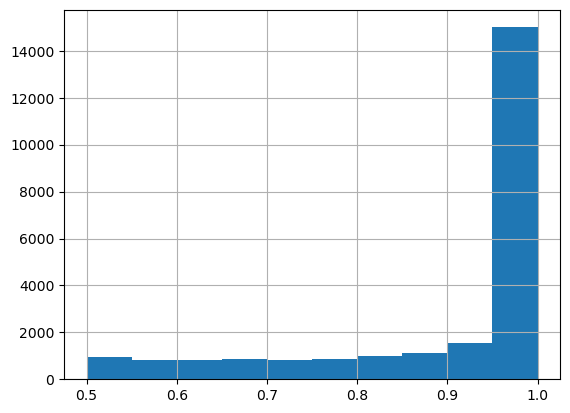

In [4]:
final_results['probability'].hist()

In [8]:
import geopandas as gpd
tiles = gpd.read_parquet(
    "/home/christopher.x.ren/embeddings/ra_tea/planet_embeddings_v2/ps_monthly_sen2_normalized_analytic_8b_sr_subscription_2023_09_mosaic.parquet",
    columns=['id', 'geometry'])


In [9]:
geom_results = final_results.merge(tiles, on='id', how='left')


In [11]:
geom_results = geom_results.drop(columns=['geometry_x'])

In [14]:
gpd.GeoDataFrame(geom_results).to_parquet(
    "gs://demeter-labs/tea/detections/planet_tile_classifier_dataset_v2_java-sumatra_80m_predictions.parquet")

In [17]:
results_gdf

,id,probability,geometry_y
0,qpz79bs7xww,0.791550,"POLYGON ((100.27695 -0.78907, 100.27982 -0.789..."
1,qpz7btfw8ng,0.789098,"POLYGON ((100.21929 -0.71577, 100.22216 -0.715..."
2,qpz7kyzcjej,0.681851,"POLYGON ((100.4135 -0.79913, 100.41638 -0.7991..."
3,qpzduq619ex,0.711286,"POLYGON ((100.73503 -0.88968, 100.7379 -0.8896..."
4,qpzeh1nvtq8,0.631432,"POLYGON ((100.73071 -0.87387, 100.73359 -0.873..."
...,...,...,...
26140,w0qdph5jvsy,0.575861,"POLYGON ((99.45117 1.77936, 99.45404 1.77936, ..."
26141,w0qdph7y20w,0.697337,"POLYGON ((99.45196 1.7808, 99.45484 1.7808, 99..."
26142,w0qdphdwwsw,0.513523,"POLYGON ((99.45052 1.78224, 99.4534 1.78224, 9..."
26143,w0qdphjmbsy,0.611731,"POLYGON ((99.45404 1.77936, 99.45692 1.77936, ..."


In [19]:
results_gdf = gpd.GeoDataFrame(geom_results.rename(columns={'geometry_y': 'geometry'}))
dissolved = gpd.GeoDataFrame(geometry=[results_gdf.unary_union], crs=results_gdf.crs)
dissolved.to_parquet(
    "gs://demeter-labs/tea/detections/planet_tile_classifier_dataset_v2_java-sumatra_80m_predictions_union.geoparquet")

/tmp/ipykernel_823752/4064980446.py:2: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  dissolved = gpd.GeoDataFrame(geometry=[results_gdf.unary_union], crs=results_gdf.crs)


In [20]:
dissolved

,geometry
0,"MULTIPOLYGON (((97.76847 2.6791, 97.76703 2.67..."
